In [1]:
import os
import glob
import random

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from tqdm import tqdm

import sys
sys.path.insert(0, "..")

from helper import get_mask, get_pivot_table, id2filename

In [2]:
dataframe_path = "../../../Dataset/uw-madison-gi-tract-image-segmentation/train.csv"
img_paths = glob.glob("../../../Dataset/uw-madison-gi-tract-image-segmentation/train/*/*/scans/*.png")
pivot_df = get_pivot_table(dataframe_path)

In [3]:
path = img_paths[0]

img = cv2.imread(path, -1)
mask = get_mask(path, pivot_df)

In [4]:
print(img.shape, mask.shape)

(266, 266) (266, 266, 3)


In [5]:
img_to_plot = list()
for img_path in tqdm(img_paths):
    #img = cv2.imread(img_path, -1)
    mask = get_mask(img_path, pivot_df)
    if mask[:,:].sum() > 0:
        img_to_plot.append(img_path)
print(mask.shape)

  1%|█                                                                            | 505/38496 [00:03<04:28, 141.74it/s]


KeyboardInterrupt: 

In [64]:
def plot_1d_img_3d_mask(img, mask):
    plt.figure(figsize=(8,8))
    plt_img = img.copy()
    plt_img = np.expand_dims(plt_img, axis=-1)
    plt_img = np.repeat(plt_img, axis=-1, repeats=3)
    print(plt_img.shape, mask.shape)
    plt_img[mask>0] = 255
    plt.imshow(plt_img)
    
    custom_lines = [
        Line2D([0], [0], color="red", lw=4),
        Line2D([0], [0], color="green", lw=4),
        Line2D([0], [0], color="blue", lw=4)
    ]

    plt.legend(custom_lines, ["large_bowel", "small_bowel", "stomach"])
    plt.show()
    
def plot_1d_imgs_3d_masks(imgs, masks):
    
    assert len(imgs) == len(masks)
    fig, axs = plt.subplots(1, len(imgs), figsize=(20,8))
    print(type(imgs), type(masks))
    for i, (img, mask) in enumerate(zip(imgs, masks)):
        plt_img = img.copy()
        plt_img = np.expand_dims(plt_img, axis=-1)
        plt_img = np.repeat(plt_img, axis=-1, repeats=3)
        #print(plt_img.shape, mask.shape)
        plt_img[mask>0] = 255
        
        axs[i].imshow(plt_img)
        
        custom_lines = [
            Line2D([0], [0], color="red", lw=4),
            Line2D([0], [0], color="green", lw=4),
            Line2D([0], [0], color="blue", lw=4)
        ]
        plt.legend(custom_lines, ["large_bowel", "small_bowel", "stomach"], loc=4)
    
    plt.show()
    
def plot_1d_imgs_3d_masks_v(imgs, masks):
    
    assert len(imgs) == len(masks)
    fig, axs = plt.subplots(len(imgs), 1, figsize=(8,20))
    print(type(imgs), type(masks))
    for i, (img, mask) in enumerate(zip(imgs, masks)):
        plt_img = img.copy()
        plt_img = np.expand_dims(plt_img, axis=-1)
        plt_img = np.repeat(plt_img, axis=-1, repeats=3)
        #print(plt_img.shape, mask.shape)
        plt_img[mask>0] = 255
        
        axs[i].imshow(plt_img)
        
        custom_lines = [
            Line2D([0], [0], color="red", lw=4),
            Line2D([0], [0], color="green", lw=4),
            Line2D([0], [0], color="blue", lw=4)
        ]
        plt.legend(custom_lines, ["large_bowel", "small_bowel", "stomach"], loc=4)
    
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'list'> <class 'list'>


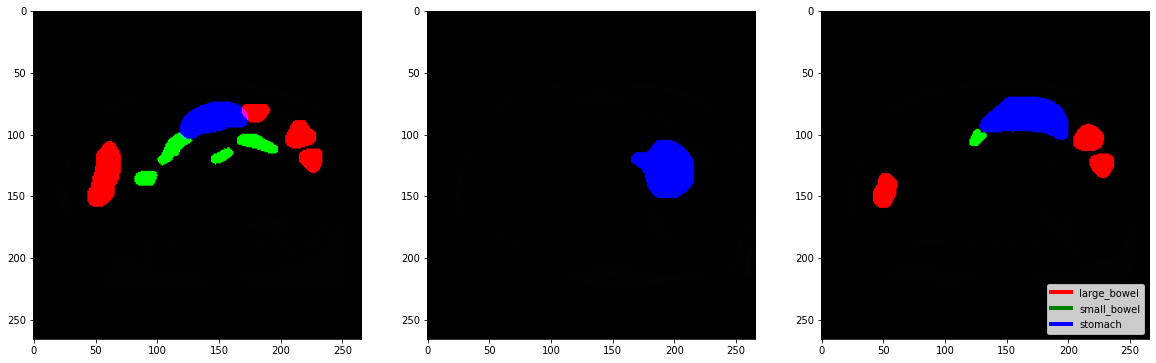

In [44]:
imgs = list()
masks = list()
for i in range(3):
    img_path = random.choice(img_to_plot)
    img = cv2.imread(img_path, -1)
    mask = get_mask(img_path, pivot_df)
    masks.append(mask)
    imgs.append(img)
plot_1d_imgs_3d_masks(imgs, masks)

# Why different image sizes?

In [45]:
img_paths = glob.glob("../../../Dataset/uw-madison-gi-tract-image-segmentation/train/*/*/scans/*.png")

In [46]:
df = pd.read_csv(dataframe_path)
df.head()

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [47]:
b = [a.split(os.sep)[1:3] + a.split(os.sep)[-1].replace(".png", "").split("_") + [len(os.listdir(os.sep.join(a.split(os.sep)[:-1])))] for a in tqdm(img_paths)]
df_more_data = pd.DataFrame([["_".join(a[1:4])] + a[4:] for a in tqdm(b)], columns=["id", "sliceHeight", "sliceWidth", "pixelSpacingHeight", "pixelSpacingWidth", "num_slices"])

100%|████████████████████████████████████████████████████████████████████████| 38496/38496 [00:00<00:00, 204912.82it/s]


In [48]:
big_df = pivot_df.merge(df_more_data, on="id")

big_df[["sliceHeight", "sliceWidth", "num_slices"]] = big_df[["sliceHeight", "sliceWidth", "num_slices"]].astype(int)
big_df[["pixelSpacingHeight", "pixelSpacingWidth"]] = big_df[["pixelSpacingHeight", "pixelSpacingWidth"]].astype(float)

In [72]:
big_df["case"] = big_df["id"].str.split("_").apply(lambda x: x[0])
big_df

,id,large_bowel,small_bowel,stomach,sliceHeight,sliceWidth,pixelSpacingHeight,pixelSpacingWidth,num_slices,case
0,case101_day20_slice_0001,NaN,NaN,NaN,266,266,1.5,1.5,144,case101
1,case101_day20_slice_0002,NaN,NaN,NaN,266,266,1.5,1.5,144,case101
2,case101_day20_slice_0003,NaN,NaN,NaN,266,266,1.5,1.5,144,case101
3,case101_day20_slice_0004,NaN,NaN,NaN,266,266,1.5,1.5,144,case101
4,case101_day20_slice_0005,NaN,NaN,NaN,266,266,1.5,1.5,144,case101
...,...,...,...,...,...,...,...,...,...,...
38491,case9_day22_slice_0140,NaN,NaN,NaN,360,310,1.5,1.5,144,case9
38492,case9_day22_slice_0141,NaN,NaN,NaN,360,310,1.5,1.5,144,case9
38493,case9_day22_slice_0142,NaN,NaN,NaN,360,310,1.5,1.5,144,case9
38494,case9_day22_slice_0143,NaN,NaN,NaN,360,310,1.5,1.5,144,case9


In [50]:
big_df[["sliceHeight", "sliceWidth", "pixelSpacingHeight", "pixelSpacingWidth", "num_slices"]].apply(
    lambda x: (x["sliceHeight"], x["sliceWidth"], x["pixelSpacingHeight"], x["pixelSpacingWidth"], x["num_slices"]), 
    axis=1
).value_counts()

(266.0, 266.0, 1.5, 1.5, 144.0)     25920
(360.0, 310.0, 1.5, 1.5, 144.0)     11232
(276.0, 276.0, 1.63, 1.63, 80.0)     1200
(234.0, 234.0, 1.5, 1.5, 144.0)       144
dtype: int64

In [80]:
big_df.groupby("sliceHeight")["case"].nunique()

sliceHeight
234     1
266    64
276     7
360    29
Name: case, dtype: int64

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<class 'list'> <class 'list'>


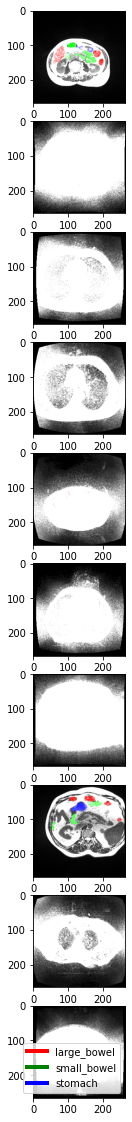

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'list'> <class 'list'>


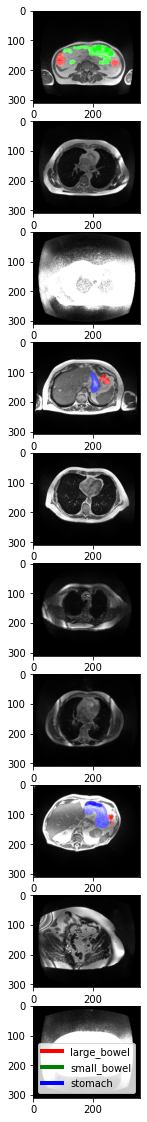

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<class 'list'> <class 'list'>


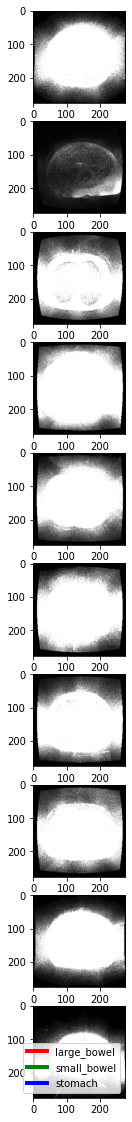

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<class 'list'> <class 'list'>


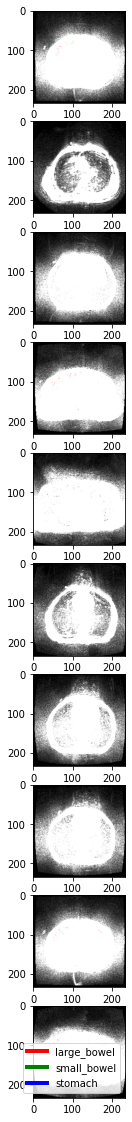

In [65]:
num_to_sample = 10

image_confs_dfs = [
    big_df[big_df["sliceHeight"] == 266].sample(num_to_sample),
    big_df[big_df["sliceHeight"] == 360].sample(num_to_sample),
    big_df[big_df["pixelSpacingWidth"] == 1.63].sample(num_to_sample),
    big_df[big_df["sliceHeight"] == 234].sample(num_to_sample)
]
img_paths = glob.glob("../../../Dataset/uw-madison-gi-tract-image-segmentation/train/*/*/scans/*.png")

for df in image_confs_dfs:
    imgs = df["id"].apply(lambda x: id2filename(x, img_paths)).to_list()
    masks = [get_mask(img_path, pivot_df) for img_path in imgs]
    imgs = [cv2.imread(img, -1) for img in imgs]
    plot_1d_imgs_3d_masks_v(imgs, masks)


In [52]:
img_paths = glob.glob("../../../Dataset/uw-madison-gi-tract-image-segmentation/train/*/*/scans/*.png")

In [53]:
2**16

65536

In [54]:
len(imgs)

10

In [55]:
len(masks)

10